In [2]:
import re
import string

import pandas as pd
pd.set_option('display.max_colwidth', None)

import numpy as np

import spacy
#!python -m spacy download en_core_web_sm
#!python -m spacy download en_core_web_lg


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jaredgodar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [41]:

import nltk
nltk.download('stopwords')

[nltk_data] Error loading stopwords: <urlopen error EOF occurred in
[nltk_data]     violation of protocol (_ssl.c:1129)>


False

In [3]:
patient_notes = pd.read_csv("patient_notes.csv")
features = pd.read_csv("features.csv")

print(patient_notes[patient_notes["case_num"] == 0][:10])
features[features["case_num"] == 0][:10]

   pn_num  case_num  \
0       0         0   
1       1         0   
2       2         0   
3       3         0   
4       4         0   
5       5         0   
6       6         0   
7       7         0   
8       8         0   
9       9         0   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

feature_num  case_num  \
0            0         0   
1            1         0   
2            2         0   
3            3         0   
4            4         0   
5            5         0   
6            6         0   
7            7         0   
8            8         0   
9            9         0   

                                                       feature_text  
0   Family-history-of-MI-OR-Family-history-of-myocardial-infarction  
1                                Family-history-of-thyroid-disorder  
2                                                    Chest-pressure  
3                                             Intermittent-symptoms  
4                                                       Lightheaded  
5  No-hair-changes-OR-no-nail-changes-OR-no-temperature-intolerance  
6                                                      Adderall-use  
7                                               Shortness-of-breath  
8                                                      Caffeine-use  
9                                    heart-pounding-OR-heart-racing

In [4]:
case_num_zero = patient_notes["pn_history"][patient_notes["case_num"] == 0][:1500]
whole_case_num_zero = "\n".join(case_num_zero.to_list())
len(whole_case_num_zero)
whole_case_num_zero[:1000]

"17-year-old male, has come to the student health clinic complaining of heart pounding. Mr. Cleveland's mother has given verbal consent for a history, physical examination, and treatment\r\n-began 2-3 months ago,sudden,intermittent for 2 days(lasting 3-4 min),worsening,non-allev/aggrav\r\n-associated with dispnea on exersion and rest,stressed out about school\r\n-reports fe feels like his heart is jumping out of his chest\r\n-ros:denies chest pain,dyaphoresis,wt loss,chills,fever,nausea,vomiting,pedal edeam\r\n-pmh:non,meds :aderol (from a friend),nkda\r\n-fh:father had MI recently,mother has thyroid dz\r\n-sh:non-smoker,mariguana 5-6 months ago,3 beers on the weekend, basketball at school\r\n-sh:no std\n17 yo male with recurrent palpitations for the past 3 mo lasting about 3 - 4 min, it happened about 5 - 6 times since the beginning. One time durign a baskeball game two days ago light headedness, pressure in the chest, catching breath, but no fainting. During teh episodes no sweating.

In [5]:
corpus = whole_case_num_zero.lower()

In [6]:
#removing trailing whitespaces
corpus = ' '.join([token for token in corpus.split()])

### Tokenizing Text

In [42]:
from nltk.corpus import stopwords


In [ ]:
from pprint import pprint
##NLTK
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
from nltk.tokenize import word_tokenize
stop_words_nltk = set(stopwords.words('english'))

tokenized_corpus_nltk = word_tokenize(corpus)
print("\nNLTK\nTokenized corpus:",tokenized_corpus_nltk)
tokenized_corpus_without_stopwords = [i for i in tokenized_corpus_nltk if not i in stop_words_nltk]
print("Tokenized corpus without stopwords:",tokenized_corpus_without_stopwords)


##SPACY 
from spacy.lang.en.stop_words import STOP_WORDS
import spacy
spacy_model = spacy.load('en_core_web_lg')

stopwords_spacy = spacy_model.Defaults.stop_words
print("\nSpacy:")
tokenized_corpus_spacy = word_tokenize(corpus)
print("Tokenized Corpus:",tokenized_corpus_spacy)
tokens_without_sw= [word for word in tokenized_corpus_spacy if not word in stopwords_spacy]

print("First thousand tokenized corpus without stopwords",tokens_without_sw[:1000])

In [8]:
print("Difference between NLTK and spaCy output:\n",
      set(tokenized_corpus_without_stopwords)-set(tokens_without_sw))

Difference between NLTK and spaCy output:
 {'anywhere', 'us', 'though', 'via', 'amount', 'become', 'done', 'two', 'go', 'still', 'made', 'move', 'take', 'along', 'rather', "'ll", 'least', 'much', 'back', 'last', 'however', 'per', 'sometime', 'wherein', 'various', 'would', 'please', 'either', 'next', 'alone', 'behind', 'although', 'never', 'often', 'whereas', 'nowhere', 'serious', 'less', 'many', 'must', 'without', 'sometimes', 'neither', 'mostly', 'within', 'upon', 'might', 'top', 'afterwards', 'ten', 'three', 'first', 'using', 'becomes', 'also', 'nine', 'thereafter', 'none', 'else', 'several', 'one', 'since', 'side', 'becoming', 'seemed', 'everyone', 'quite', 'may', 'even', 'well', 'seeming', 'give', 'could', 'five', 'across', 'besides', 'everything', 'keep', 'someone', 'throughout', 'whole', 'regarding', 'four', 'something', 'anything', 'otherwise', 'another', 'toward', 'part', 'full', "n't", "'m", 'almost', 'seem', 'thus', 'others', 'yet', 'elsewhere', 'ever', 'nothing', 'unless', '

## Stemming

In [ ]:
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
stemmer= PorterStemmer()

print("Before Stemming:")
print(corpus[:1000])

print("After Stemming:")
for word in tokenized_corpus_nltk:
    print(stemmer.stem(word),end=" ")

### Lemmatization

In [14]:
pd.options.display.max_info_rows=100


In [15]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
nltk.download('wordnet')
lemmatizer=WordNetLemmatizer()

for word in tokenized_corpus_nltk:
    print(lemmatizer.lemmatize(word),end=" ")

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/jaredgodar/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


17-year-old male , ha come to the student health clinic complaining of heart pounding . mr. cleveland 's mother ha given verbal consent for a history , physical examination , and treatment -began 2-3 month ago , sudden , intermittent for 2 day ( lasting 3-4 min ) , worsening , non-allev/aggrav -associated with dispnea on exersion and rest , stressed out about school -reports fe feel like his heart is jumping out of his chest -ros : denies chest pain , dyaphoresis , wt loss , chill , fever , nausea , vomiting , pedal edeam -pmh : non , med : aderol ( from a friend ) , nkda -fh : father had mi recently , mother ha thyroid dz -sh : non-smoker , mariguana 5-6 month ago,3 beer on the weekend , basketball at school -sh : no std 17 yo male with recurrent palpitation for the past 3 mo lasting about 3 - 4 min , it happened about 5 - 6 time since the beginning . one time durign a baskeball game two day ago light headedness , pressure in the chest , catching breath , but no fainting . during teh 

### POS Taggig

In [ ]:
len(corpus)

In [ ]:
truncated_corpus=corpus[:100000]

In [ ]:
#POS tagging using spacy
print("POS Tagging using spacy:")
doc = spacy_model(truncated_corpus)
# Token and Tag
for token in doc:
    print(token,":", token.pos_)

#pos tagging using nltk
nltk.download('averaged_perceptron_tagger')
print("POS Tagging using NLTK:")
pprint(nltk.pos_tag(word_tokenize(truncated_corpus)))

### Bag of N-Grams

In [ ]:
notes.head()

In [ ]:
patient_notes.head()

In [ ]:
documents = patient_notes[patient_notes["case_num"] == 0].pn_history

In [ ]:
documents  = documents.values.tolist()

In [ ]:
processed_docs = [doc.lower().replace(".","") for doc in documents]
processed_docs

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

#Ngram vectorization example with count vectorizer and uni, bi, trigrams
count_vect = CountVectorizer(ngram_range=(1,3))

#Build a BOW representation for the corpus
bow_rep = count_vect.fit_transform(processed_docs)

#Look at the vocabulary mapping
print("Our vocabulary: ", count_vect.vocabulary_)

#see the BOW rep for first 2 documents
print("BoW representation for 'Note 0': ", bow_rep[0].toarray())
print("BoW representation for 'Note1 ",bow_rep[1].toarray())


---

## Pre-Trained Word Embeddings

### Train Model on corpus

In [ ]:
#!pip install gensim

https://github.com/RaRe-Technologies/gensim-data

In [16]:
from gensim.models.word2vec import Word2Vec
import gensim.downloader as api

In [17]:
model = Word2Vec(corpus)  # train a model from the corpus


In [ ]:
# To install only the requirements of this notebook, uncomment the lines below and run this cell

# ===========================

!pip install scikit-learn==0.21.3
!pip install wget==3.2
!pip install gensim==3.6.0
!pip install psutil==5.4.8
!pip install spacy==2.2.4

# ===========================

In [18]:
import os
import wget
import gzip
import shutil



In [19]:
gn_vec_path = "GoogleNews-vectors-negative300.bin"
if not os.path.exists("GoogleNews-vectors-negative300.bin"):
    if not os.path.exists("../Ch2/GoogleNews-vectors-negative300.bin"):
        #Downloading the reqired model
        if not os.path.exists("../Ch2/GoogleNews-vectors-negative300.bin.gz"):
            if not os.path.exists("GoogleNews-vectors-negative300.bin.gz"):
                wget.download("https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz")
            gn_vec_zip_path = "GoogleNews-vectors-negative300.bin.gz"
        else:
            gn_vec_zip_path = "../Ch2/GoogleNews-vectors-negative300.bin.gz"
        #Extracting the required model
        with gzip.open(gn_vec_zip_path, 'rb') as f_in:
            with open(gn_vec_path, 'wb') as f_out:
                shutil.copyfileobj(f_in, f_out)
    else:
        gn_vec_path = "../Ch2/" + gn_vec_path

print(f"Model at {gn_vec_path}")

Model at GoogleNews-vectors-negative300.bin


In [20]:
import warnings #This module ignores the various types of warnings generated
warnings.filterwarnings("ignore") 

import psutil #This module helps in retrieving information on running processes and system resource utilization
process = psutil.Process(os.getpid())
from psutil import virtual_memory
mem = virtual_memory()

import time #This module is used to calculate the time  

In [21]:
from gensim.models import Word2Vec, KeyedVectors
pretrainedpath = gn_vec_path

#Load W2V model. This will take some time, but it is a one time effort! 
pre = process.memory_info().rss
print("Memory used in GB before Loading the Model: %0.2f"%float(pre/(10**9))) #Check memory usage before loading the model
print('-'*10)

start_time = time.time() #Start the timer
ttl = mem.total #Toal memory available

w2v_model = KeyedVectors.load_word2vec_format(pretrainedpath, binary=True) #load the model
print("%0.2f seconds taken to load"%float(time.time() - start_time)) #Calculate the total time elapsed since starting the timer
print('-'*10)

print('Finished loading Word2Vec')
print('-'*10)

post = process.memory_info().rss
print("Memory used in GB after Loading the Model: {:.2f}".format(float(post/(10**9)))) #Calculate the memory used after loading the model
print('-'*10)

print("Percentage increase in memory usage: {:.2f}% ".format(float((post/pre)*100))) #Percentage increase in memory after loading the model
print('-'*10)


Memory used in GB before Loading the Model: 0.07
----------
40.22 seconds taken to load
----------
Finished loading Word2Vec
----------
Memory used in GB after Loading the Model: 1.20
----------
Percentage increase in memory usage: 1656.96% 
----------


In [23]:
print("Number of words in vocablulary: ",len(w2v_model.vocab)) #Number of words in the vocabulary. 


Number of words in vocablulary:  3000000


---> 26 print("Numver of words in vocablulary: ",len(w2v_model.vocab)) #Number of words in the vocabulary.

AttributeError: The vocab attribute was removed from KeyedVector in Gensim 4.0.0.
Use KeyedVector's .key_to_index dict, .index_to_key list, and methods .get_vecattr(key, attr) and .set_vecattr(key, attr, new_val) instead.
See https://github.com/RaRe-Technologies/gensim/wiki/Migrating-from-Gensim-3.x-to-4


Tried replacing `.vocab` with `.key_to_index` - that worked

`.vocab` in gensim 3.6, `key_to_index` in >=4.0

In [24]:
#Let us examine the model by knowing what the most similar words are, for a given word!
w2v_model.most_similar('nausea')

[('nausea_vomiting', 0.7137660980224609),
 ('vomiting', 0.6683838367462158),
 ('nausea_diarrhea', 0.6606756448745728),
 ('headache_nausea', 0.6591751575469971),
 ('constipation', 0.6587526798248291),
 ('nausea_headache', 0.6541376113891602),
 ('nausea_fatigue', 0.648266613483429),
 ('dizziness', 0.643182635307312),
 ('headache_tiredness_dizziness', 0.6365180015563965),
 ('postoperative_nausea', 0.6351850628852844)]

In [ ]:
#Let us try with another word! 
w2v_model.most_similar('fever')

In [ ]:
#Let us try with another word! 
w2v_model.most_similar('infarction')

In [ ]:
#Let us try with another word! 
w2v_model.most_similar('myocardial')

In [ ]:
#Let us try with another word! 
w2v_model.most_similar('diarrhea')

captures misspellings

In [ ]:
#Let us try with another word! 
w2v_model.most_similar('thyroid')

In [ ]:
#Let us try with another word! 
w2v_model.most_similar('palpitations')

In [ ]:
#Let us try with another word! 
w2v_model.most_similar('cocaine')

In [ ]:
#Let us try with another word! 
w2v_model.most_similar('alcohol')

In [ ]:
#Let us try with another word! 
w2v_model.most_similar('arrythmias')

In [ ]:
#Let us try with another word! 
w2v_model.most_similar('anxiety')

In [ ]:
#Let us try with another word! 
w2v_model.most_similar('constipation')

In [ ]:
#Let us try with another word! 
w2v_model.most_similar('dizziness')

In [ ]:
#Let us try with another word! 
w2v_model.most_similar('diaphoresis')

In [ ]:
#Let us try with another word! 
w2v_model.most_similar('pain')

In [ ]:
#Let us try with another word! 
w2v_model.most_similar('depression')

In [ ]:
#Let us try with another word! 
w2v_model.most_similar('syncope')

---

### Training embeddings with gensim

In [ ]:
#!pip install gensim==3.6.0
#!pip install requests==2.23.0

In [4]:
from gensim.models import Word2Vec
import warnings
warnings.filterwarnings('ignore')


Gensim requires lists of lists with every document in a list - individual sentences

`corpus = [['dog', 'bites', 'man'], ['man', 'bits', 'dog], ['dog', 'eats', 'meat'], ['man', 'eats', 'food]]`

In [5]:
import prepare_jag

In [6]:
import pandas as pd

In [7]:
patient_notes=pd.read_csv('patient_notes.csv')

In [8]:
df=patient_notes.copy()

In [9]:
df.rename(columns={'pn_history':'original'}, inplace=True)

In [10]:
from prepare_jag import basic_clean3

In [11]:
df['clean']=df['original'].apply(basic_clean3)

In [12]:
import unicodedata


In [13]:
def remove_rn(string):
    string=string.lower()
    string=unicodedata.normalize('NFKD', string)\
        .encode('ascii', 'ignore')\
        .decode('utf-8', 'ignore')
    string = re.sub(r"[' +']", ' ', string)

    string=re.sub(r"[/\r?\n|\r/-]", ' ', string)
    #string=string.str.replace('\r\n', ' ')
    return string

In [14]:
import re

# FIX '-' '\n\r-'

In [15]:
df['less_clean']=df['original'].apply(remove_rn)

In [16]:
df.head()

pn_num  case_num                                           original  \
0       0         0  17-year-old male, has come to the student heal...   
1       1         0  17 yo male with recurrent palpitations for the...   
2       2         0  Dillon Cleveland is a 17 y.o. male patient wit...   
3       3         0  a 17 yo m c/o palpitation started 3 mos ago; \...   
4       4         0  17yo male with no pmh here for evaluation of p...   

                                               clean  \
0  17-year-old male  has come to the student heal...   
1  17 yo male with recurrent palpitations for the...   
2  dillon cleveland is a 17 y o  male patient wit...   
3  a 17 yo m c/o palpitation started 3 mos ago  \...   
4  17yo male with no pmh here for evaluation of p...   

                                          less_clean  
0  17 year old male, has come to the student heal...  
1  17 yo male with recurrent palpitations for the...  
2  dillon cleveland is a 17 y.o. male patient wit...  
3  a 17 yo m c o palpitation started 3 mos ago;  ...  
4  17yo male with no pmh here for evaluation of p...

In [17]:
def word_split(text):
    return [word for word in text.split(' ')]

In [18]:
df['word_list']=df.less_clean.apply(word_split)

In [19]:
df.head()

pn_num  case_num                                           original  \
0       0         0  17-year-old male, has come to the student heal...   
1       1         0  17 yo male with recurrent palpitations for the...   
2       2         0  Dillon Cleveland is a 17 y.o. male patient wit...   
3       3         0  a 17 yo m c/o palpitation started 3 mos ago; \...   
4       4         0  17yo male with no pmh here for evaluation of p...   

                                               clean  \
0  17-year-old male  has come to the student heal...   
1  17 yo male with recurrent palpitations for the...   
2  dillon cleveland is a 17 y o  male patient wit...   
3  a 17 yo m c/o palpitation started 3 mos ago  \...   
4  17yo male with no pmh here for evaluation of p...   

                                          less_clean  \
0  17 year old male, has come to the student heal...   
1  17 yo male with recurrent palpitations for the...   
2  dillon cleveland is a 17 y.o. male patient wit...   
3  a 17 yo m c o palpitation started 3 mos ago;  ...   
4  17yo male with no pmh here for evaluation of p...   

                                           word_list  
0  [17, year, old, male,, has, come, to, the, stu...  
1  [17, yo, male, with, recurrent, palpitations, ...  
2  [dillon, cleveland, is, a, 17, y.o., male, pat...  
3  [a, 17, yo, m, c, o, palpitation, started, 3, ...  
4  [17yo, male, with, no, pmh, here, for, evaluat...

In [20]:
gens_w2v_input = df.word_list.values

In [21]:
gens_w2v_input = gens_w2v_input.tolist()

In [22]:
corpus = gens_w2v_input

In [23]:
corpus

[['17',
  'year',
  'old',
  'male,',
  'has',
  'come',
  'to',
  'the',
  'student',
  'health',
  'clinic',
  'complaining',
  'of',
  'heart',
  'pounding.',
  'mr.',
  'cleveland',
  's',
  'mother',
  'has',
  'given',
  'verbal',
  'consent',
  'for',
  'a',
  'history,',
  'physical',
  'examination,',
  'and',
  'treatment',
  '',
  '',
  'began',
  '2',
  '3',
  'months',
  'ago,sudden,intermittent',
  'for',
  '2',
  'days(lasting',
  '3',
  '4',
  'min),worsening,non',
  'allev',
  'aggrav',
  '',
  '',
  'associated',
  'with',
  'dispnea',
  'on',
  'exersion',
  'and',
  'rest,stressed',
  'out',
  'about',
  'school',
  '',
  '',
  'reports',
  'fe',
  'feels',
  'like',
  'his',
  'heart',
  'is',
  'jumping',
  'out',
  'of',
  'his',
  'chest',
  '',
  '',
  'ros:denies',
  'chest',
  'pain,dyaphoresis,wt',
  'loss,chills,fever,nausea,vomiting,pedal',
  'edeam',
  '',
  '',
  'pmh:non,meds',
  ':aderol',
  '(from',
  'a',
  'friend),nkda',
  '',
  '',
  'fh:father',


> model = Word2Vec(sent, min_count=1,size= 50,workers=3, window =3, sg = 1)

**size**: The number of dimensions of the embeddings and the default is 100.

**window**: The maximum distance between a target word and words around the target word. The default window is 5.

**min_count**: The minimum count of words to consider when training the model; words with occurrence less than this count will be ignored. The default for min_count is 5.

**workers**: The number of partitions during training and the default workers is 3.

sg: The training algorithm, either CBOW(0) or skip gram(1). The default training algorithm is CBOW.

In [24]:
model_cbow = Word2Vec(corpus, window=5, min_count=5, workers = 3, sg=0) #using CBOW Architecture for trainnig


In [25]:
model_cbow['nausea']

array([-0.6268558 , -1.4788847 , -1.121659  ,  0.21573445,  1.0566822 ,
       -1.3523468 ,  1.6952127 ,  0.12358681, -2.9743881 ,  2.0736103 ,
       -4.8758082 ,  1.2732267 , -0.9555997 , -1.3692266 , -0.9691638 ,
       -1.4441818 , -3.32663   , -5.1633887 , -0.34120396,  0.52167773,
       -2.2483265 ,  1.9818    ,  2.0639906 ,  0.10314315, -0.9141706 ,
        0.96914643, -1.1723961 , -4.2898912 ,  1.984172  ,  1.4136231 ,
       -2.0855124 ,  1.383661  ,  4.245751  ,  2.2027922 , -1.3865315 ,
       -3.1956534 , -0.9663593 ,  2.9995787 , -1.6121646 ,  3.0166552 ,
        4.23263   , -0.04809067,  0.6983436 ,  0.5533301 ,  0.04995717,
       -3.8353026 ,  0.7853845 , -1.8404956 , -2.1017704 ,  6.9004126 ,
       -1.2636477 ,  1.3705959 ,  1.1803975 ,  2.526301  , -1.0783808 ,
        0.66086954,  0.6820094 ,  1.7525827 , -5.088327  , -1.7314056 ,
       -4.6795483 ,  3.7961364 , -0.4254181 ,  1.7917534 , -2.7070696 ,
       -1.9429239 ,  4.5247235 ,  4.190349  ,  2.2001598 , -1.27

In [26]:
#Training the model
# model_cbow = Word2Vec(corpus, min_count=1,sg=0) #using CBOW Architecture for trainnig
model_skipgram = Word2Vec(corpus, min_count=1,sg=1)#using skipGram Architecture for training 

In [27]:
pd.options.display.max_rows = 100


In [28]:
#Summarize the loaded model
print(model_cbow)

#Summarize vocabulary
words = (model_cbow.wv.vocab)


Word2Vec(vocab=16182, size=100, alpha=0.025)


In [29]:
#Let us try with another word!
print(model_cbow['medicine'])

[ 0.01146787 -0.28206736 -0.18278968 -0.24705851  0.0812337   0.0177996
  0.09701145 -0.01298083 -0.03956754  0.03152138  0.06162591  0.01386529
  0.05267614 -0.1794757   0.05802763  0.07816978  0.16372977  0.07671328
  0.10637402 -0.14784363  0.02464364 -0.06753601  0.07942412  0.0777959
  0.27548152  0.14391974 -0.05716489  0.08752304  0.05694101 -0.08174185
 -0.0201211   0.05095214 -0.10108644  0.10041006 -0.02889918  0.12363195
  0.29786095  0.0893638  -0.02315449  0.0210233  -0.03131056  0.219974
 -0.14222945 -0.15740271 -0.05684568 -0.11750969  0.02434803  0.07276209
  0.05054457 -0.01426324  0.12770434  0.00690059  0.05786613 -0.01956783
 -0.08148434 -0.13307062 -0.18333288  0.29246134  0.13213228 -0.05458627
  0.23420958  0.15440762  0.2268862   0.05190731 -0.06087789  0.3409226
 -0.27362087  0.02649375 -0.12282149 -0.00916132  0.21017201  0.01815007
 -0.19469295  0.03932597 -0.15060072  0.15308402  0.04058418 -0.19225255
  0.06725157  0.1481685   0.04325645  0.00335967 -0.1191

In [30]:
# save model
model_cbow.save('model_cbow.bin')

# load model
new_model_cbow = Word2Vec.load('model_cbow.bin')
print(new_model_cbow)

Word2Vec(vocab=16182, size=100, alpha=0.025)


---

### Skipgram

In [31]:
#Summarize the loaded model
print(model_skipgram)

Word2Vec(vocab=85526, size=100, alpha=0.025)


In [32]:
#Summarize the loaded model
print(model_cbow)

Word2Vec(vocab=16182, size=100, alpha=0.025)


In [ ]:
#Summarize the loaded model
print(w2v_model)

In [34]:
#Most similarity
model_skipgram.most_similar('nausea')

[('nasuea', 0.9025686383247375),
 ('nause', 0.8908870816230774),
 ('nausea,', 0.8781837224960327),
 ('nause,', 0.8319470882415771),
 ('nasuea,', 0.8276872634887695),
 ('nuasea', 0.8226834535598755),
 ('nasea', 0.8191457390785217),
 ('nausa,', 0.8188654780387878),
 ('nausea.', 0.817743182182312),
 ('nausa', 0.814711332321167)]

In [35]:
# save model
model_skipgram.save('model_skipgram.bin')

# load model
new_model_skipgram = Word2Vec.load('model_skipgram.bin')
print(new_model_skipgram)

Word2Vec(vocab=85526, size=100, alpha=0.025)


In [36]:
#Most similarity
model_skipgram.most_similar('pain')

[('apin', 0.8046348094940186),
 ('pain.', 0.7653586864471436),
 ('paint', 0.7543336153030396),
 ('pai', 0.7475034594535828),
 ('paind', 0.7456842660903931),
 ('quadrant,', 0.7399718761444092),
 ('inhalation', 0.7399511337280273),
 ('inspiration', 0.7374250888824463),
 ('sternum', 0.7367644309997559),
 ('contant,', 0.7338706254959106)]

In [62]:
#Most similarity
model_skipgram.most_similar('mi')

[('myocardial', 0.8178678750991821),
 ('mi,', 0.8176984786987305),
 ('attack', 0.8028420209884644),
 ('infarction', 0.8028110861778259),
 ('ami', 0.7867010831832886),
 ('grandfather', 0.7804961204528809),
 ('mi.', 0.776333212852478),
 ('grandpa', 0.7641782164573669),
 ('65', 0.7595184445381165),
 ('65yo', 0.7562025189399719)]

---

### Visualizing Embeddings Using TSNE


t-SNE stands for t-distributed Stochastic Neighbouring Entities. Its a technique used for visualizing high dimensional data by reducing it to a 2 or 3 dimensions.



In [37]:
model = model_cbow

In [38]:
model

In [43]:
#Preprocessing our models vocabulary to make better visualizations

words_vocab= list(model.wv.vocab)#all the words in the vocabulary. 
print("Size of Vocabulary:",len(words_vocab))
print("Few words in Vocabulary",words_vocab[:50])

#Let us remove the stop words from this it will help making the visualization cleaner
stopwords_en = stopwords.words()
words_vocab_without_sw = [word.lower() for word in words_vocab if not word in stopwords_en]
print("Size of Vocabulary without stopwords:",len(words_vocab_without_sw))
print("Few words in Vocabulary without stopwords",words_vocab_without_sw[:30])
#The size didnt reduce much after removing the stop words so lets try visualizing only a selected subset of words


Size of Vocabulary: 16182
Few words in Vocabulary ['17', 'year', 'old', 'male,', 'has', 'come', 'to', 'the', 'student', 'health', 'clinic', 'complaining', 'of', 'heart', 'pounding.', 'mr.', 'cleveland', 's', 'mother', 'given', 'verbal', 'consent', 'for', 'a', 'history,', 'physical', 'examination,', 'and', 'treatment', '', 'began', '2', '3', 'months', '4', 'allev', 'aggrav', 'associated', 'with', 'on', 'out', 'about', 'school', 'reports', 'fe', 'feels', 'like', 'his', 'is', 'jumping']
Size of Vocabulary without stopwords: 15902
Few words in Vocabulary without stopwords ['17', 'year', 'old', 'male,', 'student', 'health', 'clinic', 'complaining', 'heart', 'pounding.', 'mr.', 'cleveland', 'mother', 'given', 'verbal', 'consent', 'history,', 'physical', 'examination,', 'treatment', '', 'began', '2', '3', 'months', '4', 'allev', 'aggrav', 'associated', 'school']


In [65]:
features

feature_num  case_num  \
0              0         0   
1              1         0   
2              2         0   
3              3         0   
4              4         0   
..           ...       ...   
138          912         9   
139          913         9   
140          914         9   
141          915         9   
142          916         9   

                                                        feature_text  
0    Family-history-of-MI-OR-Family-history-of-myocardial-infarction  
1                                 Family-history-of-thyroid-disorder  
2                                                     Chest-pressure  
3                                              Intermittent-symptoms  
4                                                        Lightheaded  
..                                                               ...  
138                                      Family-history-of-migraines  
139                                                           Female  
140                                                      Photophobia  
141                                        No-known-illness-contacts  
142                                                 Subjective-fever  

[143 rows x 3 columns]

In [46]:
features = pd.read_csv('features.csv')

In [47]:
features.sample(50)

feature_num  case_num                                       feature_text
76           507         5                                No-illicit-drug-use
63           404         4                                  No-depressed-mood
105          706         7              Infertility-HX-OR-Infertility-history
11            11         0                                            17-year
0              0         0  Family-history-of-MI-OR-Family-history-of-myoc...
85           516         5                                   Increased-stress
90           603         6                  Recent-upper-respiratory-symptoms
95           608         6                             No-shortness-of-breath
81           512         5                        Associated-throat-tightness
26           200         2                               Prior-normal-periods
131          905         9                                          Neck-pain
28           202         2                                                IUD
92           605         6                            Exercise-induced-asthma
58           315         3                                            35-year
18           105         1                          No-bloody-bowel-movements
10            10         0                                Few-months-duration
31           205         2                                   Irregular-menses
38           212         2  Irregular-flow-OR-Irregular-frequency-OR-Irreg...
6              6         0                                       Adderall-use
110          802         8                                             Female
140          914         9                                        Photophobia
138          912         9                        Family-history-of-migraines
109          801         8                               Son-died-3-weeks-ago
59           400         4                     Lack-of-other-thyroid-symptoms
16           103         1                         Prior-episodes-of-diarrhea
115          807         8                 Hallucinations-after-taking-Ambien
79           510         5               Associated-feeling-of-impending-doom
93           606         6                                         Chest-pain
52           309         3                                  duration-2-months
61           402         4           Stress-due-to-caring-for-elderly-parents
4              4         0                                        Lightheaded
98           611         6  Sharp-OR-stabbing-OR-7-to-8-out-of-10-on-pain-...
7              7         0                                Shortness-of-breath
99           700         7                                             Female
53           310         3                                   Awakens-at-night
45           302         3                             Darker-bowel-movements
82           513         5                          Feels-hot-OR-Feels-clammy
94           607         6                                   Duration-x-1-day
3              3         0                              Intermittent-symptoms
111          803         8                        Auditory-hallucination-once
33           207         2                           No-premenstrual-symptoms
78           509         5                       Increased-frequency-recently
71           502         5                                    No-caffeine-use
9              9         0                     heart-pounding-OR-heart-racing
108          800         8                                 Increased-appetite
116          808         8                                   duration-3-weeks
89           602         6                                            17-year
132          906         9                                           Vomiting
39           213         2                                  Onset-3-years-ago
114          806         8                          Difficulty-falling-asleep

In [48]:
#With the increase in the amount of data, it becomes more and more difficult to visualize and interpret
#In practice, similar words are combined into groups for further visualization.

keys = ['nausea', 'pain', 'migraine', 'insomnia', 'fatigue', 'lightheaded', 'photophobia', 'thyroid', 'stress', 'depression']
embedding_clusters = []
word_clusters = []

for word in keys:
    embeddings = []
    words = []
    for similar_word, _ in model.most_similar(word, topn=30):
        words.append(similar_word)
        embeddings.append(model[similar_word])
    embedding_clusters.append(embeddings)#apending access vector of all similar words
    word_clusters.append(words)#appending list of all smiliar words

In [49]:
print("Embedding clusters:",embedding_clusters[0][0])#Access vector of the first word only
print("Word Clousters:",word_clusters[:2])

Embedding clusters: [-1.3492186  -0.794587   -1.5068471  -0.0944139   1.64792    -1.1073091
  1.257903    0.7911594  -2.3065083   0.72793525 -4.5560894  -0.21770583
 -1.4320382  -2.1418633  -1.4702213  -1.3575637  -2.191316   -2.6706042
 -0.41525888  0.0424711  -0.49236628  3.6348782   3.158747    1.5497861
 -1.1555274   0.5550758  -2.1862793  -4.0465226   1.583109    0.70167756
 -0.817449    0.48815283  2.3913932   2.1842358  -3.0237024  -1.3308
 -1.103294    2.065781   -1.3541967   1.7218561   4.055603   -1.0117935
 -0.19813728 -0.8150253   0.10007812 -2.068871    0.8523569  -1.2106738
 -1.8629811   5.9886093  -1.777387   -0.23661095 -0.38070774  0.83031446
 -2.560731    0.5182821   1.2071545   2.453841   -2.4957495  -0.8664117
 -5.2717776   3.9112644   0.47735694  0.9183681  -2.0320187  -2.3135388
  3.4582272   3.1801953   2.3171508  -2.1771083  -3.8997905  -1.1526405
  1.0808259  -2.666053   -3.011013   -2.839385    0.8636984   3.7951207
 -5.425779   -0.2588024   0.47552806  0.0794

In [50]:
from sklearn.manifold import TSNE
import numpy as np

embedding_clusters = np.array(embedding_clusters)
n, m, k = embedding_clusters.shape #geting the dimensions
tsne_model_en_2d = TSNE(perplexity=5, n_components=2, init='pca', n_iter=1500, random_state=2020) 
embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2) #reshaping it into 2d so we can visualize it

### Hyperparameters of TSNE

1. **n_components**: The number of components, i.e., the dimension of the value space
2. **perplexity**: The number of effective neighbours
3. **n_iter**: Maximum number of iterations for the optimization.
4. z: Initialization of embedding.

t-SNE requires good amount of hyperparameter tuning to give effective results. More details on the hyperparameters can be found in the official docs. It is very easy to misread tsne too. This article provides more deatils about it.

In [69]:
! pip install matplotlib

In [51]:
labels=['nausea', 'pain', 'migraine', 'insomnia', 'fatigue', 'lightheaded', 'photophobia', 'thyroid', 'stress', 'depression']

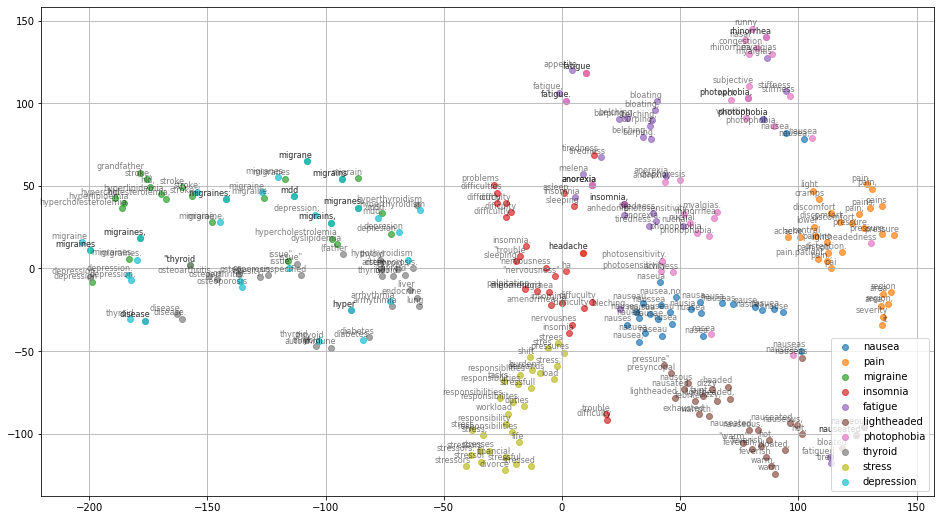

In [52]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
%matplotlib inline  

#script for constructing two-dimensional graphics using Matplotlib
def tsne_plot_similar_words(labels, embedding_clusters, word_clusters, a=0.7):
    plt.figure(figsize=(16, 9))
    

    for label, embeddings, words in zip(labels, embedding_clusters, word_clusters):
        x = embeddings[:,0]
        y = embeddings[:,1]
        plt.scatter(x, y, alpha=a, label=label)
        for i, word in enumerate(words):
            plt.annotate(word, alpha=0.5, xy=(x[i], y[i]), xytext=(5, 2), 
                         textcoords='offset points', ha='right', va='bottom', size=8)
    plt.legend(loc=4)
    plt.grid(True)
    plt.show()

tsne_plot_similar_words(labels, embeddings_en_2d, word_clusters)

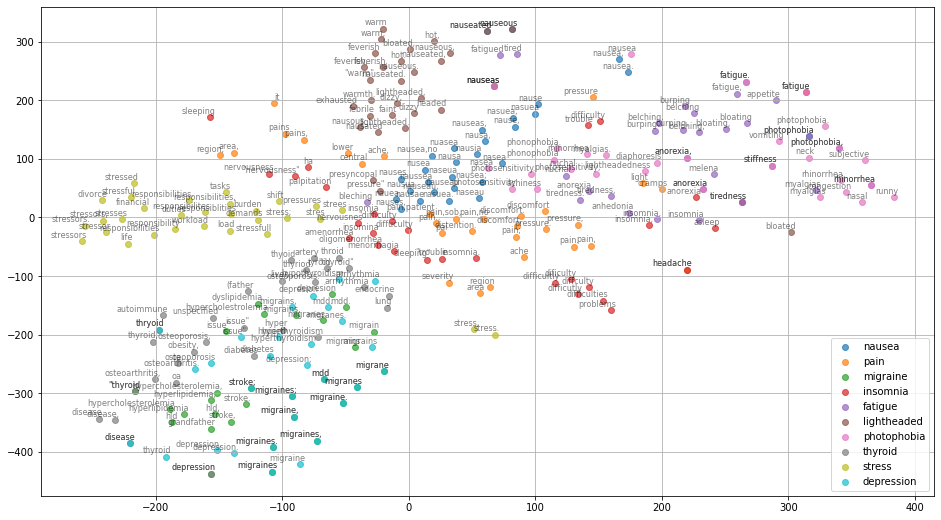

In [53]:
tsne_model_en_2d = TSNE(perplexity=25, n_components=2, init='pca', n_iter=1500, random_state=2020) 
embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)
tsne_plot_similar_words(labels, embeddings_en_2d, word_clusters)

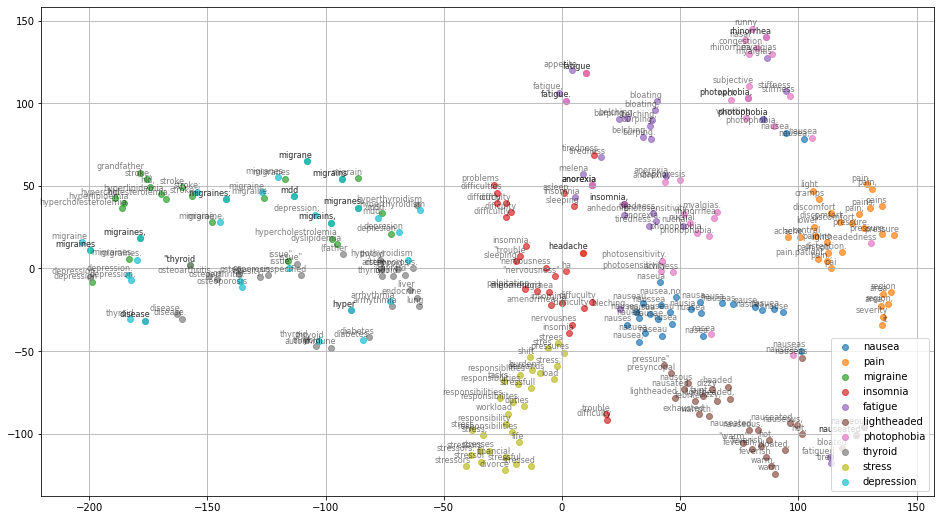

In [54]:
tsne_model_en_2d = TSNE(perplexity=5, n_components=2, init='pca', n_iter=1500, random_state=2020) 
embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)
tsne_plot_similar_words(labels, embeddings_en_2d, word_clusters)

---

## Visualizing Embeddings using Tensorboard
### Ch 3.10

https://github.com/practical-nlp/practical-nlp-code/blob/master/Ch3/10_Visualizing_Embeddings_using_Tensorboard.ipynb

In [16]:
model_cbow = Word2Vec.load('model_cbow.bin')


NameError: name 'Word2Vec' is not defined

Running into environment / version issues with different kernels -- My scispacy kernel is downgraded to gensim 3.6 - which the sample code was written in. the environment with Tensor Flow has gensim 4 -- can't switch kernels within notebook and previous cells work... 

Ttying to make a new environment with version numbers specified, but encountering some http intermittent errors when trying to download and setup

In [2]:
#making the required imports
import warnings #ignoring the generated warnings
warnings.filterwarnings('ignore')

import tensorflow as tf


In [7]:
from tensorboard.plugins import projector
#tf.logging.set_verbosity(tf.logging.ERROR)

import numpy as np
from gensim.models import KeyedVectors
import os

In [13]:
#get the model's vocabulary size
max_size = len(model.wv.vocab)-1

NameError: name 'model' is not defined

DO tensorboard in new enivronment - try to make a project environment with everything...
